In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%config Completer.use_jedi = False

### Cargar dataset

In [2]:
df = pd.read_csv("data/users.csv")
columns=df.columns

### Informacion de las columnas

- ID: Identificador unico del usuario
- AVG_RESPONSE: Tiempo promedio de descarga
- PRODUCTION: Porcentaje de produccion de datos del usuario
- CONSUME: Porcentaje de consumo del usuario
- CONSUME_OTHERS: Porcentaje que le consumen al usuario.
- LEADERSHIP(DEPRECATED): no info

### Mostrar dataset

In [3]:
# df = df.sort_values("PRODUCTION",ascending=False)
df.head(5)

,ID,AVG_RESPONSE,PRODUCTION,CONSUME,CONSUME_OTHERS,LEADERSHIP
0,43114731,0.000000,0.01112,0.000000,0.233515,0.968751
1,1405534545,0.341667,0.00000,0.022240,0.000000,0.978694
2,640881322,0.333333,0.00000,0.011120,0.000000,0.982640
3,1416963334,0.350000,0.00000,0.011120,0.000000,0.982640
4,2189419908,0.319444,0.00000,0.033359,0.000000,1.228838


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7970 entries, 0 to 7969
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              7970 non-null   int64  
 1   AVG_RESPONSE    7970 non-null   float64
 2   PRODUCTION      7970 non-null   float64
 3   CONSUME         7970 non-null   float64
 4   CONSUME_OTHERS  7970 non-null   float64
 5   LEADERSHIP      7970 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 373.7 KB


In [116]:
columns=("PRODUCTION","CONSUME","CONSUME_OTHERS")
list(map(lambda x: (x,df[x].sum()),columns))

[('PRODUCTION', 1.267652618703436),
 ('CONSUME', 98.73234738129656),
 ('CONSUME_OTHERS', 98.73234738129656)]

### Resumen estadistico

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,7970.0,7.931038e+08,8.263302e+08,6161.000000,1.751875e+08,3.575951e+08,1.492711e+09,2.887160e+09
AVG_RESPONSE,7970.0,5.341480e+01,4.671829e+01,0.000000,1.218750e+01,4.215000e+01,8.219167e+01,2.094333e+02
PRODUCTION,7970.0,1.590530e-04,1.754409e-03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.671856e-02
CONSUME,7970.0,1.238800e-02,8.789796e-03,0.000000,1.111976e-02,1.111976e-02,1.111976e-02,4.781497e-01
CONSUME_OTHERS,7970.0,1.238800e-02,1.847447e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000778e+01
LEADERSHIP,7970.0,9.310848e-01,1.584030e-01,0.010291,9.672751e-01,9.902595e-01,1.000000e+00,1.713860e+00


In [6]:
ids = df.ID.unique()
ids.sort()
ids.size

7970

<AxesSubplot:xlabel='AVG_RESPONSE', ylabel='Count'>

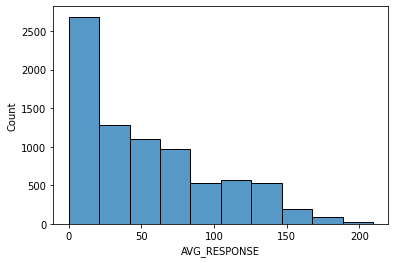

In [8]:
sns.histplot(df.AVG_RESPONSE,bins=10)

# Trace

In [39]:
trace_df = pd.read_csv('data/trace_00.csv',delimiter=',')
trace_df.TYPE = np.where(trace_df.TYPE == 'r','DOWNLOAD','UPLOAD')
trace_df.head()

,USER_ID,TYPE,FILE_ID,ARRIVAL_TIME,FILE_SIZE,USER2_ID,RF
0,4,UPLOAD,1,184,5,4,0
1,5,UPLOAD,2,315,8,5,0
2,5,UPLOAD,3,420,4,5,0
3,8,UPLOAD,4,586,3,8,0
4,10,UPLOAD,5,749,3,10,0


In [8]:
trace_df.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,2530.0,291.252569,152.644139,1.0,179.25,292.0,420.0,550.0
FILE_ID,2530.0,65.926877,57.219125,1.0,20.00,52.0,97.0,280.0
ARRIVAL_TIME,2530.0,509776.071542,314166.817231,184.0,234126.00,497494.0,775134.0,1095487.0
FILE_SIZE,2530.0,5.129249,1.919777,1.0,4.00,5.0,6.0,10.0
USER2_ID,2530.0,24.134783,28.598315,1.0,6.00,14.0,22.0,110.0
RF,2530.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0


In [133]:
trace_df.USER_ID.unique().size

505

# PRODUCTORES

In [40]:
producers       = trace_df.loc[trace_df.TYPE=='UPLOAD']
producers       = producers.sort_values("ARRIVAL_TIME",ascending=True)
# 
producers_ids   = producers.USER_ID.unique()
total_producers = producers_ids.size
producers.head(10)
# total_producers

,USER_ID,TYPE,FILE_ID,ARRIVAL_TIME,FILE_SIZE,USER2_ID,RF
0,4,UPLOAD,1,184,5,4,0
1,5,UPLOAD,2,315,8,5,0
2,5,UPLOAD,3,420,4,5,0
3,8,UPLOAD,4,586,3,8,0
4,10,UPLOAD,5,749,3,10,0
5,13,UPLOAD,6,923,9,13,0
6,12,UPLOAD,7,1097,4,12,0
7,19,UPLOAD,8,1337,4,19,0
8,57,UPLOAD,9,1511,5,57,0
9,106,UPLOAD,10,1732,4,106,0


In [41]:
producers.describe().T

,count,mean,std,min,25%,50%,75%,max
USER_ID,280.0,24.992857,27.731947,1.0,8.00,14.5,22.00,110.0
FILE_ID,280.0,140.500000,80.973247,1.0,70.75,140.5,210.25,280.0
ARRIVAL_TIME,280.0,461604.742857,335845.315635,184.0,161737.25,426494.5,763738.50,1087717.0
FILE_SIZE,280.0,5.032143,1.953501,1.0,4.00,5.0,6.00,10.0
USER2_ID,280.0,24.992857,27.731947,1.0,8.00,14.5,22.00,110.0
RF,280.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


# CONSUMIDORES 

In [42]:
consumers = trace_df.loc[trace_df.TYPE =='DOWNLOAD']
consumers = consumers.sort_values('ARRIVAL_TIME',ascending=True)
consumers = consumers.rename(columns={'USER_ID':'CONSUMER_ID','USER2_ID':'PRODUCER_ID'})
consumers_ids = consumers.CONSUMER_ID.to_numpy()
consumers.head(3)

,CONSUMER_ID,TYPE,FILE_ID,ARRIVAL_TIME,FILE_SIZE,PRODUCER_ID,RF
30,417,DOWNLOAD,12,1308,6,12,0
31,447,DOWNLOAD,15,1800,5,75,0
32,127,DOWNLOAD,2,1860,8,5,0


In [18]:
consumers.describe().T

,count,mean,std,min,25%,50%,75%,max
CONSUMER_ID,2250.0,324.387111,127.204554,111.0,211.00,316.0,435.00,550.0
FILE_ID,2250.0,56.646667,45.713600,1.0,19.00,46.0,85.00,202.0
ARRIVAL_TIME,2250.0,515770.725778,310920.775016,1308.0,242750.25,514785.0,775977.25,1095487.0
FILE_SIZE,2250.0,5.141333,1.915635,1.0,4.00,5.0,6.00,10.0
PRODUCER_ID,2250.0,24.028000,28.708508,1.0,6.00,14.0,21.00,110.0
RF,2250.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


# PRODUCTORES & CONSUMIDORES

In [21]:
set(producers_ids.tolist()) & set(consumers_ids.tolist()) 

set()

# Volume 

In [44]:
def getDownloadsByProducerID(producerID,**kwargs):
    df = kwargs.get('df',consumers)
    return df.loc[df.PRODUCER_ID.isin(producerID)]
def getVolumen(**kwargs)
downloads = getDownloadsByProducerID([11])

downloads

,CONSUMER_ID,TYPE,FILE_ID,ARRIVAL_TIME,FILE_SIZE,PRODUCER_ID,RF
50,150,DOWNLOAD,20,8823,6,11,0
53,366,DOWNLOAD,20,9704,6,11,0
75,508,DOWNLOAD,20,18076,6,11,0
81,121,DOWNLOAD,20,20548,6,11,0
83,234,DOWNLOAD,20,21518,6,11,0
...,...,...,...,...,...,...,...
2384,484,DOWNLOAD,103,1012363,6,11,0
2388,188,DOWNLOAD,95,1013949,1,11,0
2442,114,DOWNLOAD,146,1032427,5,11,0
2477,433,DOWNLOAD,146,1047882,5,11,0


# Avarage arrival time

In [20]:
arrival_time  = trace_df.ARRIVAL_TIME.to_numpy()
total_request = arrival_time.size
avg_at        = np.diff(arrival_time).sum()/total_request
avg_at
# total_request

432.9260869565217

# EJEMPLOS

In [41]:
user22 = trace_df.loc[trace_df['USER_ID']==22]
user22.head(5)

,USER_ID,TYPE,FILE_ID,ARRIVAL_TIME,FILE_SIZE,USER2_ID,RF
4,22,w,31,2804,7,22,0.6
84,22,w,46,32906,5,22,0.6
89,22,w,47,34873,8,22,0.6
563,22,w,137,237593,2,22,0.6
620,22,w,147,258570,8,22,0.6


In [63]:
filesOfUser22 = user22['FILE_ID'].to_numpy()
downloadsOfUser22Files = trace_df.loc[trace_df['FILE_ID'].isin(filesOfUser22) ].loc[trace_df['TYPE']=='r']
downloadsOfUser22Files.head(5)

,USER_ID,TYPE,FILE_ID,ARRIVAL_TIME,FILE_SIZE,USER2_ID,RF
295,337,r,47,124660,8,22,0.0
312,276,r,47,130910,8,22,0.0
321,432,r,46,133547,5,22,0.0
351,246,r,46,144353,5,22,0.0
448,381,r,47,179157,8,22,0.0


In [68]:
x= downloadsOfUser22Files.groupby('FILE_ID').sum()[['FILE_SIZE']]
x.columns=['TOTAL_SIZE']
x.sum()

TOTAL_SIZE    246
dtype: int64

# Pandas

In [48]:
names = pd.Series(["Nacho","Freddy"],name="Name")
ages = pd.Series([12,28],name="Age")

df = pd.DataFrame({'Name':names,'Age':ages})
df.head()

,Name,Age
0,Nacho,12
1,Freddy,28


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2.0,20.0,11.313708,12.0,16.0,20.0,24.0,28.0
